In [1]:
# Add better support for matplotlib
%matplotlib notebook

In [2]:
from schedule_plotter.Process import Process
from schedule_plotter.plot_tools import plot, test_schedule_algorithm

from schedule_plotter.implementations.FCFS import FCFS
from schedule_plotter.implementations.SJF import SJF

# You can find this implementation at the bottom of this notebook
#from schedule_plotter.implementations.RoundRobin import RoundRobin

In [3]:
# Generate data from either csv or random-generated
dataset = Process.gen_n_random_in_range(9, (0,1), (1, 3), (1,20))
dataset = Process.read_from_csv("example/input.csv")

Plotting FirstComeFirstServed algorithm


<IPython.core.display.Javascript object>


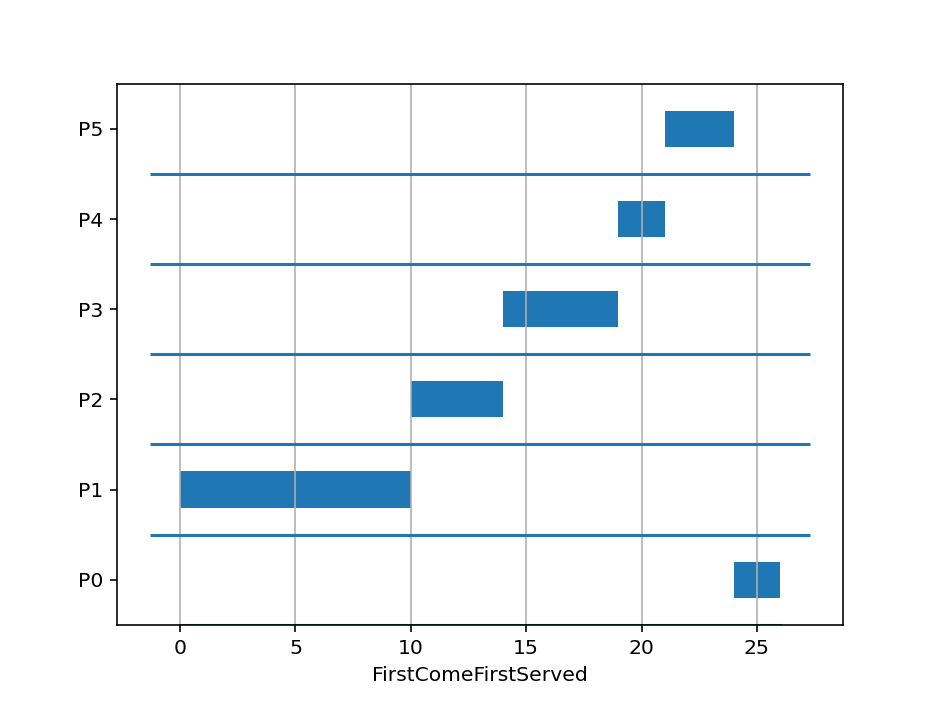

In [4]:
# Plot FCFS using test funciton
test_schedule_algorithm(FCFS, dataset)

Plotting ShortestJobFirst algorithm


<IPython.core.display.Javascript object>


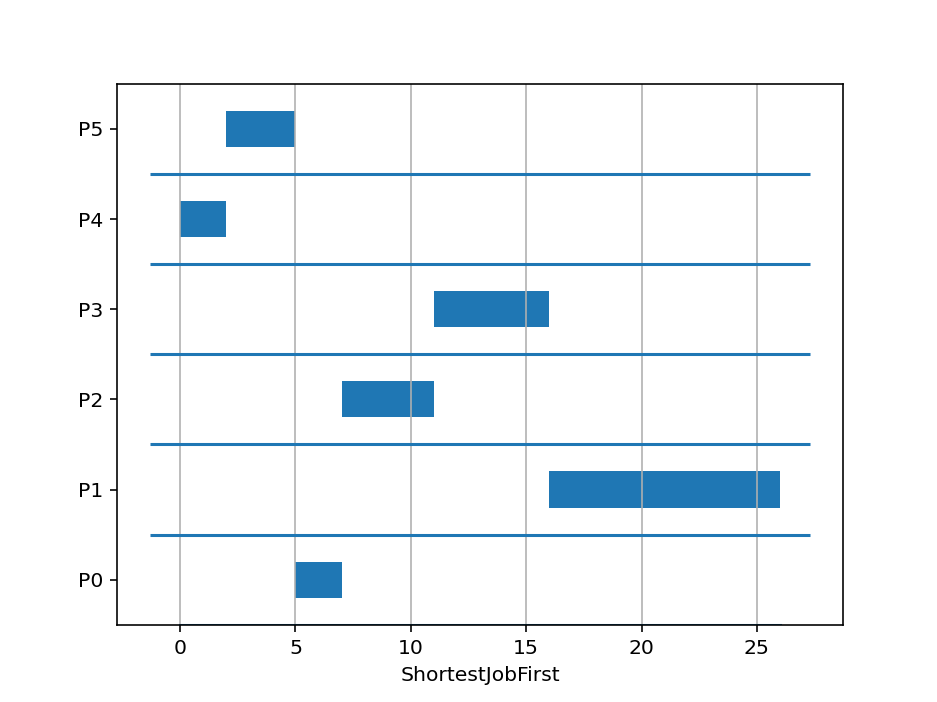

In [5]:
# Direct plotting of SJF
scheduled_data = SJF.function(dataset)
print(f"Plotting {SJF.name} algorithm")
plot(SJF.name, scheduled_data)

In [6]:
# Implementing RoundRobin algorithm

from copy import copy

from schedule_plotter.Algorithm import Algorithm
from schedule_plotter.Process import Process
from schedule_plotter.PriorityQueueWrapper import PriorityQueueWrapper

# See interface for run function in Algoritm class
def run(processes, quantum=1):
    out = {}
    time_now = 0

    processes_copy = copy(processes)

    # FIFO queue
    running_queue = PriorityQueueWrapper(sortBy="FIFO")

    while len(processes_copy)>0 or len(running_queue)>0:
        
        # Insert new processes in queue
        while True:
            for proc in processes_copy[:]:
                if proc.start <= time_now:
                    running_queue.put(proc)
                    processes_copy.remove(proc)

            if len(running_queue) > 0:
                break
            
            time_now += 1

        # Get the process
        process = running_queue.pop()

        duration = min(quantum, process.duration)

        # Run it
        if process.id in out.keys():
            out[process.id].append((time_now, time_now+duration))
        else:
            out[process.id] = [(time_now, time_now+duration)]

        # Re-insert it if it is not finished
        process.duration -= duration
        process.start = time_now + duration
        if process.duration > 0:
            processes_copy.append(process)

        time_now += duration

    return out
    

RoundRobin = Algorithm("RoundRobin", run)

Plotting RoundRobin algorithm


<IPython.core.display.Javascript object>


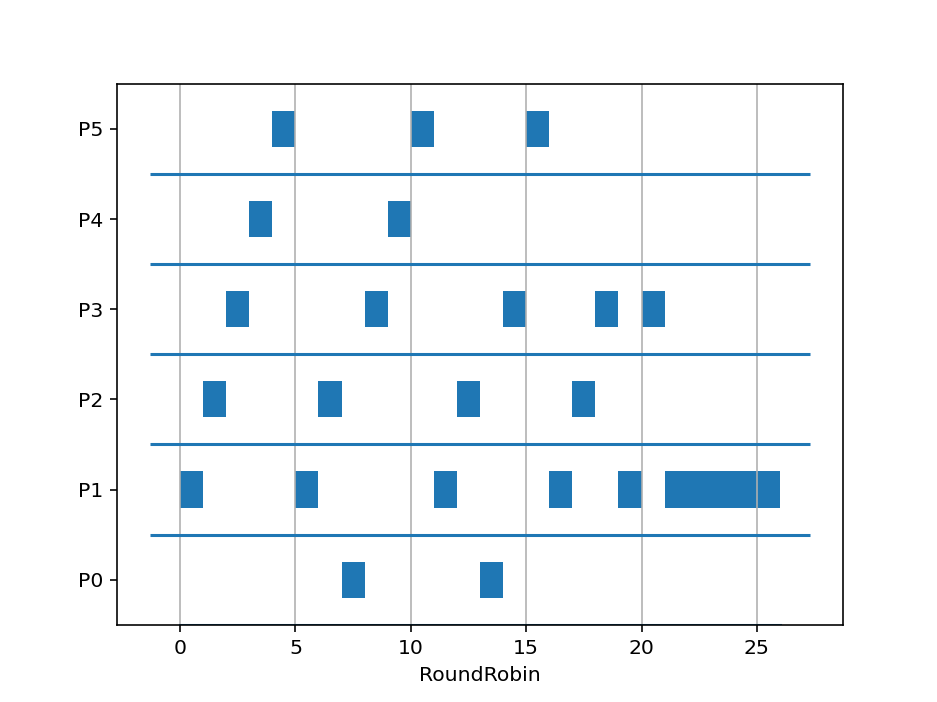

In [7]:
# Testing RoundRobin alorithm
test_schedule_algorithm(RoundRobin, dataset)